# Plot CPU utlization of experiment 2.1 version 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import glob

In [2]:
def readCSV2pd_CPU(directoryPath,tf_load,edge_name):
    """
    This function is to read a CSV file and return the average value and varience
    input: directoryPath : path of file names
            tf_load : list of traffic load
    """
    avg_cpu = []
    var_cpu = []
    for tf in tf_load:
        cpu_data = pd.DataFrame()
        for file_name in glob.glob(directoryPath+edge_name+str(tf)+'.csv'):
            x = pd.read_csv(file_name, low_memory=False)
            cpu_data = pd.concat([cpu_data,x],axis=0)
            Row, Col = cpu_data.shape
            df = cpu_data.drop(range(18,Row))
            #print(df['percentage_cpu_utilisation'])
            cpu_mean = df.mean(axis=0)
            cpu_var = df.var(axis=0)
            avg_cpu.append(cpu_mean['percentage_cpu_utilisation'])
            var_cpu.append(cpu_var['percentage_cpu_utilisation'])
    return avg_cpu, var_cpu

## Read CSV file

In [3]:
directoryPath = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version3_Experiment_style/Experiment2_1/Edge1_CPU/"

In [4]:
tf_load  = [i*2 for i in range(1,20)]
edge_name = 'edge1CPU_M'
avg_cpu, var_cpu = readCSV2pd_CPU(directoryPath,tf_load,edge_name)

In [5]:
directoryPath = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/CPU_utilization_Experiment/version3_Experiment_style/Experiment2_1/Edge4_CPU/"

In [6]:
tf_load  = [i*2 for i in range(1,20)]
edge_name = 'edge4CPU_M'
avg_cpu4, var_cpu4 = readCSV2pd_CPU(directoryPath,tf_load,edge_name)

## Plot CPU utilization

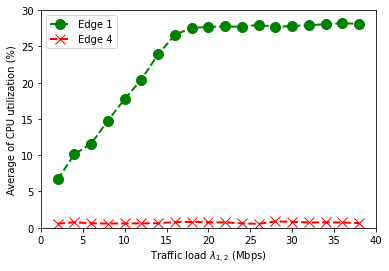

In [7]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)


ax.plot(tf_load, avg_cpu, color='green', linestyle='dashed', linewidth = 2,
         marker='o', markerfacecolor='green', markersize=10,label="Edge 1")
ax.plot(tf_load, avg_cpu4, color='red', linestyle='dashed', linewidth = 2,
         marker='x', markerfacecolor='red', markersize=10,label="Edge 4")
plt.ylim(0,30)
plt.xlim(0,40)
plt.xlabel('Traffic load $\lambda_{4,1}$ (Mbps)')
# naming the y axis
plt.ylabel('Average of CPU utilization (%)')

plt.legend()

plt.show()
 

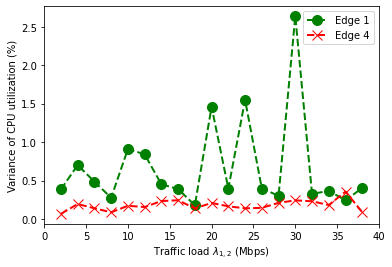

In [8]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.plot(tf_load, var_cpu, color='green', linestyle='dashed', linewidth = 2,
         marker='o', markerfacecolor='green', markersize=10,label="Edge 1")

ax.plot(tf_load, var_cpu4, color='red', linestyle='dashed', linewidth = 2,
         marker='x', markerfacecolor='red', markersize=10,label="Edge 4")

#plt.ylim(0,20)
plt.xlim(0,40)
plt.xlabel('Traffic load $\lambda_{1,2}$ (Mbps)')
# naming the y axis
plt.ylabel('Variance of CPU utilization (%)')

plt.legend()

plt.show()